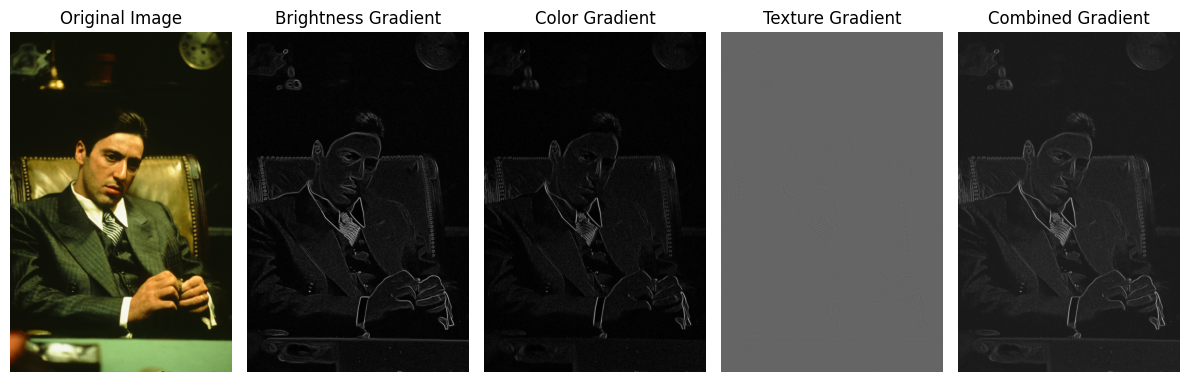

In [3]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an example image
image = cv2.imread('alpacino.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

# Convert the image to grayscale for brightness and texture gradient detection
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Calculate brightness gradient using Sobel operator
gradient_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
brightness_gradient = np.sqrt(gradient_x**2 + gradient_y**2)

# Calculate color gradient using gradient magnitude of RGB channels
r_gradient = cv2.Sobel(image[:,:,0], cv2.CV_64F, 1, 0, ksize=3)
g_gradient = cv2.Sobel(image[:,:,1], cv2.CV_64F, 1, 0, ksize=3)
b_gradient = cv2.Sobel(image[:,:,2], cv2.CV_64F, 1, 0, ksize=3)
color_gradient = np.sqrt(r_gradient**2 + g_gradient**2 + b_gradient**2)

# Calculate texture gradient using Laplacian operator
texture_gradient = cv2.Laplacian(gray_image, cv2.CV_64F)

# Combine all detectors to see contour detection effect
combined_gradient = brightness_gradient + color_gradient + texture_gradient

output_folder = os.path.join(os.path.expanduser("."), "result")
os.makedirs(output_folder, exist_ok=True)
cv2.imwrite(os.path.join(output_folder, "image.jpg"), image)
cv2.imwrite(os.path.join(output_folder, "gray_image.jpg"), gray_image)
cv2.imwrite(os.path.join(output_folder, "brightness_gradient.jpg"), brightness_gradient)
cv2.imwrite(os.path.join(output_folder, "color_gradient.jpg"), color_gradient)
cv2.imwrite(os.path.join(output_folder, "texture_gradient.jpg"), texture_gradient)
cv2.imwrite(os.path.join(output_folder, "combined_gradient.jpg"), combined_gradient)

# Plotting the results
plt.figure(figsize=(12, 4))

plt.subplot(151)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(152)
plt.imshow(brightness_gradient, cmap='gray')
plt.title('Brightness Gradient')
plt.axis('off')

plt.subplot(153)
plt.imshow(color_gradient, cmap='gray')
plt.title('Color Gradient')
plt.axis('off')

plt.subplot(154)
plt.imshow(texture_gradient, cmap='gray')
plt.title('Texture Gradient')
plt.axis('off')

plt.subplot(155)
plt.imshow(combined_gradient, cmap='gray')
plt.title('Combined Gradient')
plt.axis('off')

plt.tight_layout()
plt.show()
